<a href="https://colab.research.google.com/github/himanshuarora1703/codebasics-ML-exercise/blob/main/Logistic%20Regression/Logitic_regression_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
y = pd.Series(data['target'],name='label')

In [6]:
X.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
# do the train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

X_train.shape

(120, 4)

In [8]:
# do scaling of data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# train the model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='saga',max_iter=10000)

lr.fit(X_train,y_train)

y_pred_train = lr.predict(X_train) 
y_pred_test = lr.predict(X_test)

In [21]:
# check for the accuracy
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

print('The train accuracy is',accuracy_score(y_train,y_pred_train))
print('The test accuracy is',accuracy_score(y_test,y_pred_test))

The train accuracy is 0.9833333333333333
The test accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


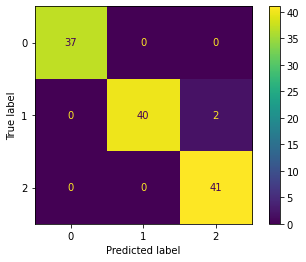

In [22]:
#plot the confusion matrix

plot_confusion_matrix(lr,X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


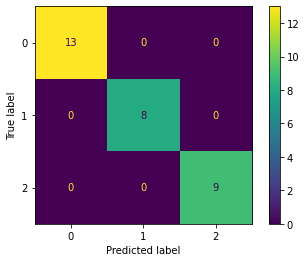

In [24]:
plot_confusion_matrix(lr,X_test,y_test)

In [25]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.95      0.98        42
           2       0.95      1.00      0.98        41

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [26]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
from sklearn.model_selection import cross_validate

cv = cross_validate(lr,X_train,y_train,cv=5,scoring='accuracy',return_train_score=True)

cv['test_score'].mean()

0.975

In [32]:
cv['train_score'].mean()

0.9791666666666666